# Sentiment Analysis with TextBlob

## Resources

Before we get started. Here are the resources I use:
1. [TextBlob readthedocs](https://textblob.readthedocs.io/en/dev/install.html)
2. Which leads into [TextBlob readthedocs Quickstart](https://textblob.readthedocs.io/en/dev/quickstart.html)
3. 

## Imports and Downloads

In [2]:
# install TextBlob
!pip install -U textblob

# download linguistic data
!python -m textblob.download_corpora
# alternative download if you want minimum corpora
# python -m textblob.download_corpora lite 

from textblob import TextBlob

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ameyer\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ameyer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ameyer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ameyer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ameyer\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ameyer\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to

Finished.


## Creating Our First TextBlob

In [3]:
wiki = TextBlob("Python is a high-level, general-purpose programming language.")

In [4]:
wiki.tags

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('high-level', 'JJ'),
 ('general-purpose', 'JJ'),
 ('programming', 'NN'),
 ('language', 'NN')]

In [5]:
# extract nouns phrases
wiki.noun_phrases

WordList(['python'])

## Runthrough

#### Basic Example

In [6]:
# assign TextBlob output to testimonial
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")

In [7]:
# take sentinment of text
testimonial.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [8]:
# get polarity only
testimonial.sentiment.polarity

0.39166666666666666

#### Tokenization

In [9]:
zen = TextBlob("Beautiful is better than ugly. "
               "Explicit is better than implicit. "
               "Simple is better than complex.")

# break TextBlob into words
zen.words

WordList(['Beautiful', 'is', 'better', 'than', 'ugly', 'Explicit', 'is', 'better', 'than', 'implicit', 'Simple', 'is', 'better', 'than', 'complex'])

In [10]:
# break TextBlob into sentences
zen.sentences

[Sentence("Beautiful is better than ugly."),
 Sentence("Explicit is better than implicit."),
 Sentence("Simple is better than complex.")]

In [11]:
# print sentiment of each sentence
for sentence in zen.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.2166666666666667, subjectivity=0.8333333333333334)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.06666666666666667, subjectivity=0.41904761904761906)


In [12]:
# word inflection
sentence = TextBlob('Use 4 spaces per indentation level.')

In [13]:
# print sentence words
sentence.words

WordList(['Use', '4', 'spaces', 'per', 'indentation', 'level'])

In [14]:
# singularize word at position 2
sentence.words[2].singularize()

'space'

In [15]:
# pluralize word at position 2
sentence.words[-1].pluralize()

'levels'

In [16]:
from textblob import Word
w = Word("octopi")
w.lemmatize()

'octopus'

In [17]:
w = Word("went")
w.lemmatize("v")  # Pass in WordNet part of speech (verb)

'go'

#### Jon's Example

In [18]:
dirty_words = "kittens puppies apple pie lovely"
str(dirty_words)

'kittens puppies apple pie lovely'

In [19]:
riot_text_sentiment = TextBlob(dirty_words).sentiment

In [20]:
riot_text_sentiment

Sentiment(polarity=0.5, subjectivity=0.75)

#### On our taxday Dataset

In [21]:
# run twarc and convert jsonl to csv
#!twarc configure
# ...
# python utils.json2csv.py taxday.jsonl > taxday.csv

In [22]:
# load csv
import pandas as pd
taxday_data = pd.read_csv('../../taxday.csv')

# print first few rows
taxday_data.head(3)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,...,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1516174539742494723,https://twitter.com/djkerns/status/15161745397...,Mon Apr 18 21:59:14 +0000 2022,2022-04-18 21:59:14+00:00,djkerns,Here’s the #TaxDay message to amplify. https:/...,retweet,NaN,TaxDay,https://pbs.twimg.com/media/FQo_pHoVcAMvyHE.jpg,...,21905,180,628,7,NaN,Dr. Dannie J. Kerns - Callin' It Like I See It.,15137,NaN,NaN,False
1,1516174533732016132,https://twitter.com/jeff_gang/status/151617453...,Mon Apr 18 21:59:12 +0000 2022,2022-04-18 21:59:12+00:00,jeff_gang,"We hate to break it to you on #TaxDay, but you...",retweet,NaN,TaxDay TaxBillionaires,NaN,...,7028,1332,2589,55,NaN,Jeff Gang,2005,NaN,http://jeffgang.com,False
2,1516174532041531394,https://twitter.com/JenniferThePart/status/151...,Mon Apr 18 21:59:12 +0000 2022,2022-04-18 21:59:12+00:00,JenniferThePart,"This #TaxDay, you paid your fair share in taxe...",retweet,NaN,TaxDay TaxBillionaires,NaN,...,191758,7964,8447,4,NaN,Jennifer Partridge,177593,NaN,NaN,False


In [23]:
# extract tweet text from taxday dataframe as a new dataframe
taxday_tweets = pd.DataFrame([taxday_data.text]).transpose()

# print first few of rows
taxday_tweets.head(3)

,text
0,Here’s the #TaxDay message to amplify. https:/...
1,"We hate to break it to you on #TaxDay, but you..."
2,"This #TaxDay, you paid your fair share in taxe..."


As you can see, there are a bunch of clunky parts to the tweet like the hashtag. So we'll clean them as they did [here](https://medium.com/analytics-vidhya/sentiment-analysis-on-ellens-degeneres-tweets-using-textblob-ff525ea7c30f)

In [24]:
# Cleaning the tweets using regex function
from Lib import re as re

# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
    x = re.sub(r'^RT[\s]+', '', x)
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
    x = re.sub(r'#', '', x)
    x = re.sub(r'@[A-Za-z0–9]+', '', x) 
    x = re.sub('\n', '', x)
    return x
            
taxday_tweets['text'] = taxday_tweets['text'].apply(clean)

# print first few rows of dataset
taxday_tweets.head(3)

,text
0,Here’s the TaxDay message to amplify.
1,"We hate to break it to you on TaxDay, but you ..."
2,"This TaxDay, you paid your fair share in taxes..."


As you can see, the tweets are now much cleaner.

In [26]:
# Calculate polarity and subjectivity of the tweets
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

# apply it to our dataset
taxday_tweets['polarity'] = taxday_tweets['text'].apply(polarity)
taxday_tweets['subjectivity'] = taxday_tweets['text'].apply(subjectivity)

# print the first few rows
taxday_tweets.head(5)

,text,polarity,subjectivity
0,Here’s the TaxDay message to amplify.,0.000,0.000000
1,"We hate to break it to you on TaxDay, but you ...",-0.125,0.550000
2,"This TaxDay, you paid your fair share in taxes...",0.400,0.766667
3,On TaxDay let's not forget about DonTheBilker....,0.000,0.000000
4,I’m not just running on lower taxes. I’m runni...,0.200,0.400000


In [55]:
# add the positive and negative category

# create function to determine tweet sentiment category
def sentiment_cat(row):
    if row['polarity'] > 0:
        return 'Positive'
    elif row['polarity'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

# apply sentiment to taxday_tweets
taxday_tweets['sentiment'] = taxday_tweets.apply(lambda row: sentiment_cat(row), axis=1)

In [56]:
taxday_tweets

,text,polarity,subjectivity,Sentiment,sentiment
0,Here’s the TaxDay message to amplify.,0.000,0.000000,NaN,Neutral
1,"We hate to break it to you on TaxDay, but you ...",-0.125,0.550000,NaN,Negative
2,"This TaxDay, you paid your fair share in taxes...",0.400,0.766667,NaN,Positive
3,On TaxDay let's not forget about DonTheBilker....,0.000,0.000000,NaN,Neutral
4,I’m not just running on lower taxes. I’m runni...,0.200,0.400000,NaN,Positive
...,...,...,...,...,...
15693,TaxDay should be TakeMyMoneyDay,0.000,0.000000,NaN,Neutral
15694,Here’s the TaxDay message to amplify.,0.000,0.000000,NaN,Neutral
15695,If the richest Americans paid their fair share...,0.700,0.900000,NaN,Positive
15696,No one likes TaxDay. We’re here to help brigh...,0.300,0.200000,NaN,Positive


We can see that TaxtBlob doesn't pick up all the subtleties that are written in tweets but it does a generally okay job. 

#### Graphing

Let's graph it anyway!

*Plot 1*

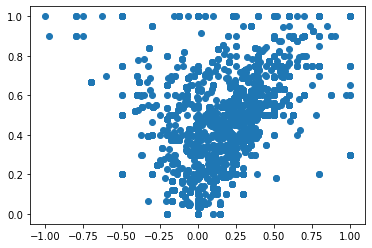

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(taxday_tweets.polarity, taxday_tweets.subjectivity)

*Plot 2*

In [78]:
# take random sample
df = taxday_tweets.sample(n=5000)

# we took a random sample to prevent our file from being too big. I'll write more about that later
# also, I'll do some more analysis in terms of determining how correct our model is, how much is positive,...

In [77]:
import altair as alt
alt.Chart(df).mark_point().encode(
    x='polarity',
    y='subjectivity',
    color='sentiment',
)

alt.Chart(...)